In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip

x = np.array([[1, 2, 3, 4, 5]])
r = np.random.rand(4, 4)
print(qutip.Qobj(r))

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.58722799 0.98197662 0.87089433 0.26543043]
 [0.77564769 0.50222442 0.18174462 0.78372753]
 [0.15315798 0.94185629 0.21073673 0.97497287]
 [0.88913149 0.06423604 0.75635761 0.26670557]]


(<Figure size 640x480 with 2 Axes>, <Axes: >)

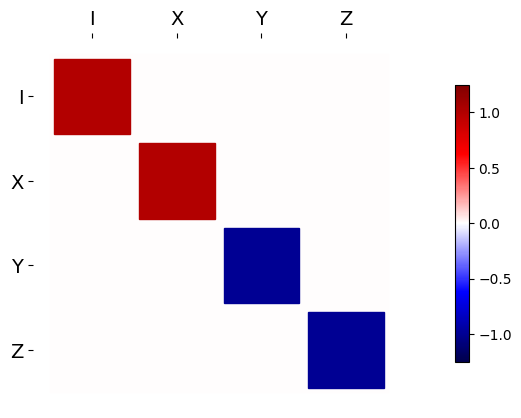

In [ ]:
import matplotlib.pyplot as plt
from qutip import *
settings.colorblind_safe = True

plt.rcParams['savefig.transparent'] = True

X = sigmax()
S = spre(X)*spost(X.dag())

hinton(S)

10.0%. Run time:  10.14s. Est. time left: 00:00:01:31
20.0%. Run time:  19.91s. Est. time left: 00:00:01:19
30.0%. Run time:  30.68s. Est. time left: 00:00:01:11
40.0%. Run time:  40.79s. Est. time left: 00:00:01:01
50.0%. Run time:  51.05s. Est. time left: 00:00:00:51
60.0%. Run time:  61.64s. Est. time left: 00:00:00:41
70.0%. Run time:  72.29s. Est. time left: 00:00:00:30
80.0%. Run time:  82.72s. Est. time left: 00:00:00:20
90.0%. Run time:  93.32s. Est. time left: 00:00:00:10
100.0%. Run time: 103.72s. Est. time left: 00:00:00:00
Total run time: 103.97s


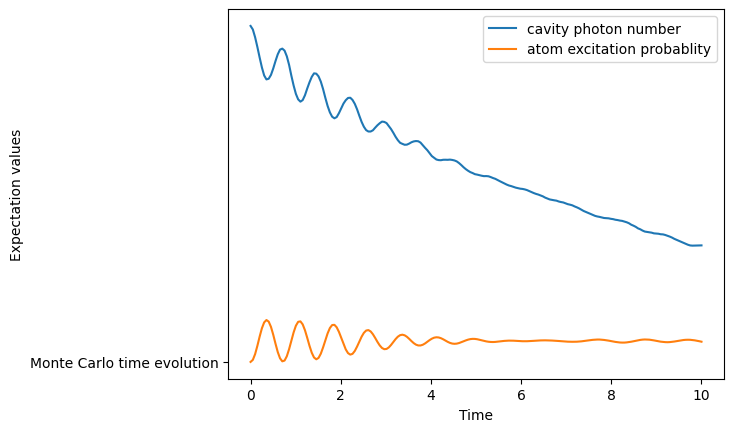

In [ ]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 8))
a = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2*np.pi*a.dag()*a+2*np.pi*sm.dag()*sm+2*np.pi*0.25*(sm*a.dag()+sm.dag()*a)
data = mcsolve(H, psi0, times, [np.sqrt(0.1)*a],
               e_ops=[a.dag()*a, sm.dag()*sm])

plt.figure()
plt.plot(times, data.expect[0], times, data.expect[1])
plt.plot('Monte Carlo time evolution')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probablity"))
plt.show()

In [ ]:
from numpy import linspace


delta=0.2*2*np.pi
eps0=1.0*2*np.pi
gamma1=0.5

H=-delta/2.0*sigmax()-eps0/2.0*sigmaz()



R=bloch_redfield_tensor(H,[[sigmax(),ohmic_spectrum]]，fock_basis=True)

tlist=np.linspace(0,15.0,1000)
psi0=rand_ket(2,seed=1)

e_ops=[sigmax(),sigmay(),sigmaz()]

expt_list=mesolve(R,psi0,tlist,e_ops=e_eps).expect

sphere=bloch()

sphere.add_points([expt_list[0],expt_list[1],expt_list[2]])

sphere.vector_color=['r']

sphere.add_vectors(np.array([delta,0,eps0])/np.sqrt(delta))